In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')

In [15]:
image_path = "/content/dog.jpg"

In [16]:
results = model(image_path)


image 1/1 /content/dog.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 190.6ms
Speed: 8.8ms preprocess, 190.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


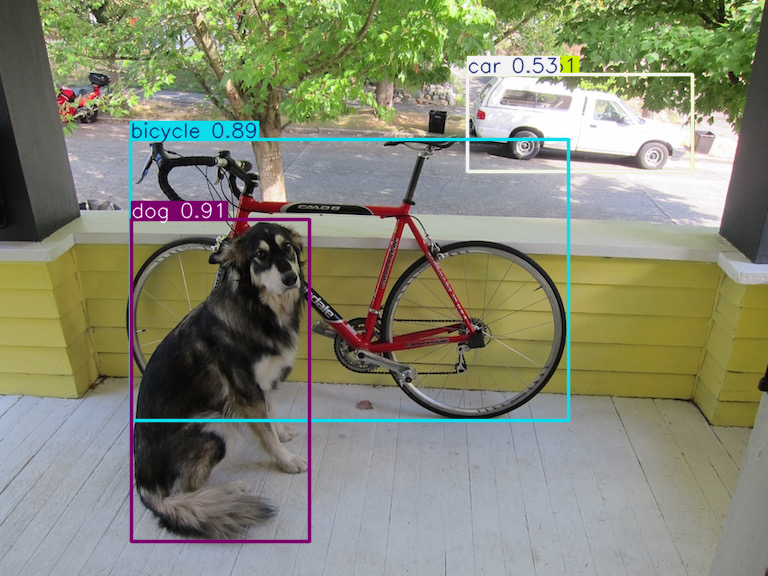

In [17]:
# Annotate the image with boxes and labels
annotated_frame = results[0].plot()

# Display the image
from google.colab.patches import cv2_imshow
cv2_imshow(annotated_frame)

**Real time Object Detection **

In [18]:
# Install required libraries
!pip install ultralytics opencv-python pyyaml

# Import libraries
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import time

print("Libraries installed and imported successfully!")

Libraries installed and imported successfully!


In [19]:
# Function to capture image from webcam
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # Get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # Decode base64 image
  binary = b64decode(data.split(',')[1])
  # Save image
  with open(filename, 'wb') as f:
    f.write(binary)

  return filename

print("Webcam function ready!")

Webcam function ready!


In [20]:
# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Using nano for speed in Colab

print("YOLO model loaded successfully!")

YOLO model loaded successfully!
